In [24]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [17]:
def str_mapper(wd):
    if wd == 0.1:
        return "1e-1"
    elif wd == 1e-2:
        return "1e-2"
    elif wd == 1e-3:
        return "1e-3"
    elif wd == 1e-4:
        return "1e-4"
    
def namer(basic_wd, conv_wd):
    fpath = "./logs/"
    fname = "model0_basic" + str_mapper(basic_wd) + "_conv" + str_mapper(conv_wd) + ".txt"
    return fpath + fname
def get_test_loss(basic_wd, conv_wd):
    name = namer(basic_wd, conv_wd)
    with open(name) as f:
        for line in f:
            pass
        last_line = line
    return float(last_line.split()[-2])

In [25]:
wds = [1e-1, 1e-2, 1e-3, 1e-4]
logger = []
for basic_wd in wds:
    for conv_wd in wds:
        if os.path.exists(namer(basic_wd, conv_wd)):
            logger.append([basic_wd, conv_wd, get_test_loss(basic_wd, conv_wd)])
df = pd.DataFrame(logger)
df.columns = ["basic_wd", "conv_wd", "test_acc"]
df['test_err'] = 100 - df['test_acc']

In [28]:
df

,basic_wd,conv_wd,test_acc,test_err
0,0.1000,0.1000,10.00,90.00
1,0.1000,0.0100,62.02,37.98
2,0.1000,0.0010,68.05,31.95
3,0.1000,0.0001,71.69,28.31
4,0.0100,0.1000,37.76,62.24
5,0.0100,0.0100,44.31,55.69
6,0.0100,0.0010,73.55,26.45
7,0.0100,0.0001,71.53,28.47
8,0.0010,0.0100,64.04,35.96
9,0.0010,0.0010,73.60,26.40


[]

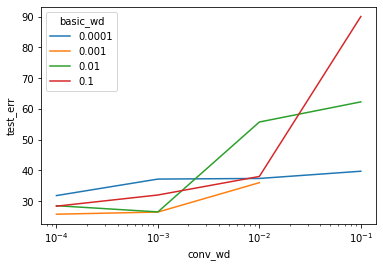

In [29]:
sns.lineplot(x='conv_wd', y='test_err', hue='basic_wd', data=df,
            palette='tab10')
plt.semilogx()